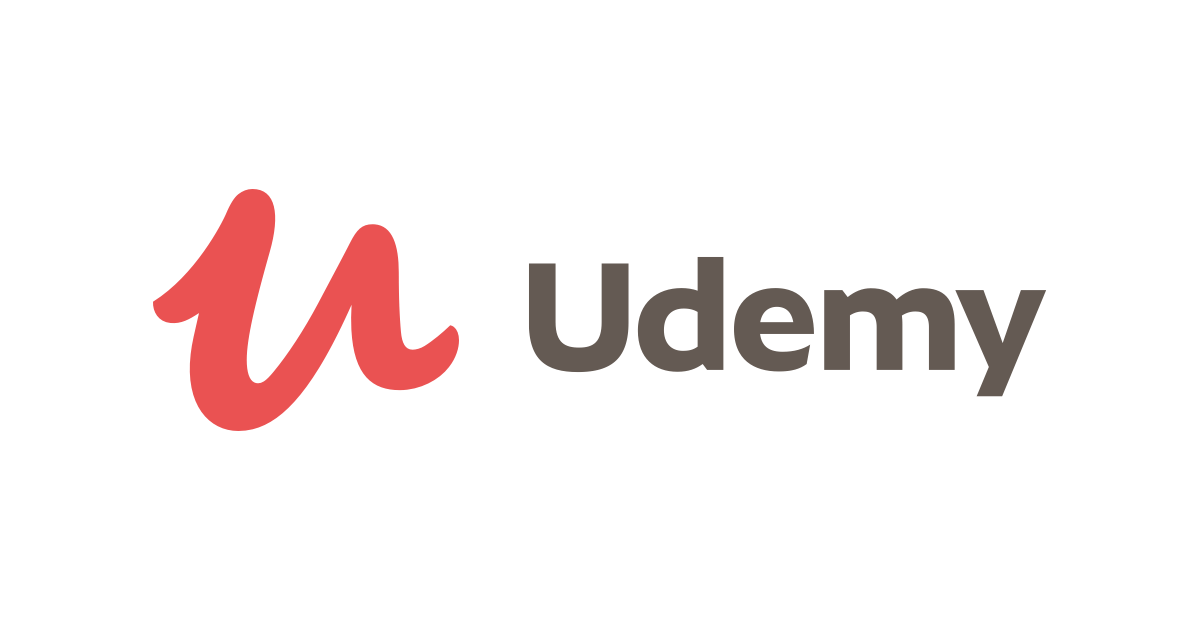

In [1]:
from PIL import Image, ImageDraw
myImage = Image.open("default-meta-image.png")
myImage

# Overview

This dataset is a compilation of all the development related courses ( 13 thousand courses) which are available on Udemy's website. Under the development category, there are courses from Finance, Accounting, Book Keeping, Compliance, Cryptocurrence, Blockchain, Economics, Investing & Trading, Taxes and much more each having multiple courses under it's domain.

The end goal of this notebook is to conduct an Exploratory Data Analysis, as well as show other data cleaning and preprocessing techniques.

In [2]:
# import relevant packages
import pandas as pd
import numpy as np
import pandas_profiling 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#upload dataset
df = pd.read_csv('udemy_output_All_Finance__Accounting_p1_p626.csv')

In [4]:
df.head(100)

id                                              title  \
0    762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1    937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2   1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3    648826         The Complete Financial Analyst Course 2020   
4    637930  An Entire MBA in 1 Course:Award Winning Busine...   
..      ...                                                ...   
95   475170                     Seth Godin's Freelancer Course   
96   856992  PMI-ACP Agile Certified Exam Prep - PMI REP 21...   
97   942752  Master Course in Tableau 10 & 2020 for Busines...   
98  1415934  Management Skills - Team Leadership Skills Mas...   
99  1362218  Leadership: How to Influence, Inspire and Impa...   

                                                  url  is_paid  \
0                  /course/the-complete-sql-bootcamp/     True   
1                                  /course/tableau10/     True   
2                         /course/pmp-pmbok6-35-pdus/     True   
3      /course/the-complete-financial-analyst-course/     True   
4   /course/an-entire-mba-in-1-courseaward-winning...     True   
..                                                ...      ...   
95              /course/seth-godin-freelancer-course/     True   
96                         /course/pmi_acp_exam_prep/     True   
97                             /course/mastertableau/     True   
98  /course/leadership-and-lean-management-masterc...     True   
99             /course/leadership-influence-everyone/     True   

    num_subscribers  avg_rating  avg_rating_recent   rating  num_reviews  \
0            295509     4.66019            4.67874  4.67874        78006   
1            209070     4.58956            4.60015  4.60015        54581   
2            155282     4.59491            4.59326  4.59326        52653   
3            245860     4.54407            4.53772  4.53772        46447   
4            374836     4.47080            4.47173  4.47173        41630   
..              ...         ...                ...      ...          ...   
95            24449     4.69697            4.69071  4.69071         4361   
96            16519     4.51699            4.52558  4.52558         4345   
97            18774     4.43962            4.43032  4.43032         4303   
98            25911     4.48485            4.48328  4.48328         4297   
99            13088     4.39762            4.38683  4.38683         4290   

    is_wishlisted  num_published_lectures  num_published_practice_tests  \
0           False                      84                             0   
1           False                      78                             0   
2           False                     292                             2   
3           False                     338                             0   
4           False                      83                             0   
..            ...                     ...                           ...   
95          False                      88                             0   
96          False                      91                             0   
97          False                      66                             0   
98          False                     257                             0   
99          False                      57                             0   

                 created        published_time  discount_price__amount  \
0   2016-02-14T22:57:48Z  2016-04-06T05:16:11Z                   455.0   
1   2016-08-22T12:10:18Z  2016-08-23T16:59:49Z                   455.0   
2   2017-09-26T16:32:48Z  2017-11-14T23:58:14Z                   455.0   
3   2015-10-23T13:34:35Z  2016-01-21T01:38:48Z                   455.0   
4   2015-10-12T06:39:46Z  2016-01-11T21:39:33Z                   455.0   
..                   ...                   ...                     ...   
95  2015-04-13T17:26:15Z  2015-04-19T18:56:33Z                     NaN   
96  2016-05-23T00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [6]:
df.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

In [7]:
# getting a deeper dive into the null cells to understand factors behind their emptiness in order to determine next steps
df1 = df[df.isna().any(axis=1)]
df1

id                                              title  \
33      139166                                Conscious Listening   
39     2246852  Emotional Intelligence at Work: Learn from You...   
40      139200                                  Powerful speaking   
80       43319           Options Trading Basics (3-Course Bundle)   
90      328266  Project Management Professional (PMP)® - 35 Co...   
...        ...                                                ...   
13603  3005408                      מושגים בסיסיים באופציות חלק ב   
13604  3467284                            Programa de Integridade   
13605  3368222  Goodwill and Method of Calculating Goodwill (A...   
13606  3211345                                Poderoso Investidor   
13607  2935720         Acabou a Previdência e agora? -  Volume 03   

                                                     url  is_paid  \
33                          /course/conscious-listening/     True   
39     /course/emotional-intelligence-at-work-learn-f...     True   
40                            /course/powerful-speaking/     True   
80                /course/learn-options-trading-courses/     True   
90                   /course/pmp-certification-complete/     True   
...                                                  ...      ...   
13603                                  /course/1-ndgzhu/    False   
13604            /course/iaudit_programa_de_integridade/    False   
13605  /course/goodwill-and-method-of-calculating-goo...    False   
13606                       /course/poderoso-investidor/    False   
13607    /course/acabou-a-previdencia-e-agora-volume-03/     True   

       num_subscribers  avg_rating  avg_rating_recent   rating  num_reviews  \
33               27681     4.47545            4.48064  4.48064        10671   
39               20978     4.45476            4.45477  4.45477         9594   
40               34296     4.43750            4.45212  4.45212         9520   
80               28932     4.42527            4.41998  4.41998         4881   
90               27653     4.40769            4.41472  4.41472         4579   
...                ...         ...                ...      ...          ...   
13603               47     0.00000            0.00000  0.00000            0   
13604               19     0.00000            0.00000  0.00000            0   
13605               47     0.00000            0.00000  0.00000            0   
13606               48     0.00000            0.00000  0.00000            0   
13607                0     0.00000            0.00000  0.00000            0   

       is_wishlisted  num_published_lectures  num_published_practice_tests  \
33             False                      14                             0   
39             False                      21                             1   
40             False                      19                             0   
80             False                      47                             0   
90             False                     345                             0   
...              ...                     ...                           ...   
13603          False                       6                             0   
13604          False                       5                             0   
13605          False                       5                             0   
13606          False                      13                             0   
13607          False                      14                             0   

                    created        published_time  discount_price__amount  \
33     2013-12-29T13:38:01Z  2013-12-31T16:51:18Z                     NaN   
39     2019-02-28T23:37:10Z  2019-03-18T14:09:54Z                     NaN   
40     2013-12-29T15:38:47Z  2013-12-31T16:52:41Z                     NaN   
80     2013-02-24T14:47:08Z  2013-02-25T11:36:06Z                     NaN   
90     2014-10-27T16:27:34Z  2014-11-05T21:07:38Z                     NaN   
...   

From my observation, it is only logical for discounts and price details to be null if payments were not made for those courses (where is_paid is False).

In [8]:
# drop irrelevant and duplicate feature columns 
df = df.drop(['discount_price__currency', 'discount_price__price_string', 
              'price_detail__currency', 'price_detail__price_string'], axis = 1)

In [9]:
# replace nulls with 0 for all free courses in prices and discounts column
df["price_detail__amount"] = df["price_detail__amount"].apply(lambda x: 0 if pd.isnull(x) else x) 
df["discount_price__amount"] = df["discount_price__amount"].apply(lambda x: 0 if pd.isnull(x) else x)

In [10]:
df.isnull().sum()

id                              0
title                           0
url                             0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
price_detail__amount            0
dtype: int64

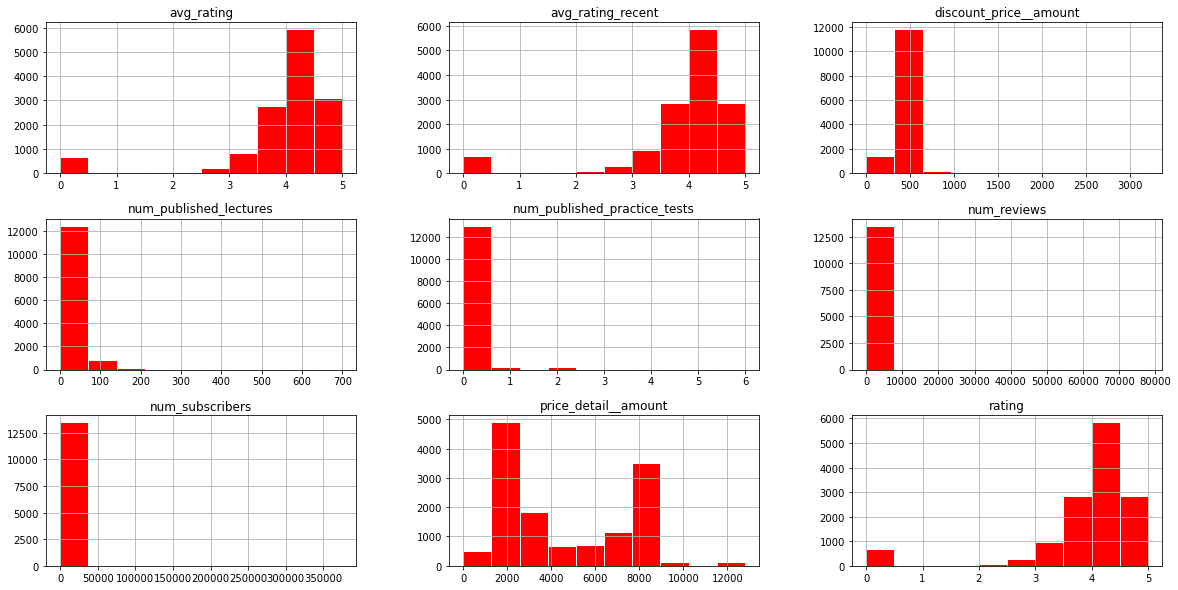

num_subscribers    avg_rating  avg_rating_recent        rating  \
count     13608.000000  13608.000000       13608.000000  13608.000000   
mean       2847.010435      3.923293           3.912242      3.912242   
std        9437.865634      1.031304           1.039237      1.039237   
min           0.000000      0.000000           0.000000      0.000000   
25%          62.000000      3.800000           3.787315      3.787315   
50%         533.000000      4.194440           4.181735      4.181735   
75%        2279.500000      4.450000           4.452105      4.452105   
max      374836.000000      5.000000           5.000000      5.000000   

        num_reviews  num_published_lectures  num_published_practice_tests  \
count  13608.000000            13608.000000                  13608.000000   
mean     243.169827               32.224794                      0.110523   
std     1580.965895               42.766911                      0.623501   
min        0.000000                0.000000                      0.000000   
25%        7.000000               12.000000                      0.000000   
50%       24.000000               21.000000                      0.000000   
75%       87.000000               37.000000                      0.000000   
max    78006.000000              699.000000                      6.000000   

       discount_price__amount  price_detail__amount  
count            13608.000000          13608.000000  
mean               443.017637           4477.272193  
std                294.784921           3173.858399  
min                  0.000000              0.000000  
25%                455.000000           1280.000000  
50%                455.000000           3200.000000  
75%                455.000000           8640.000000  
max               3200.000000          12800.000000

In [11]:
# graphical distribution of all numeric features
numerics = ['num_subscribers', 'avg_rating', 'avg_rating_recent', 'rating', 'num_reviews', 'num_published_lectures', 'num_published_practice_tests', 'discount_price__amount', 'price_detail__amount']
df.loc[:,numerics].hist(color='red', figsize=(20,10), edgecolor='white')
plt.show()
display(df[numerics].describe())


In [12]:
# this gives me more informations especially number of labels in my categorical variable
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')

id : 13608 labels
title : 13563 labels
url : 13608 labels
is_paid : 2 labels
num_subscribers : 4875 labels
avg_rating : 1965 labels
avg_rating_recent : 11781 labels
rating : 11781 labels
num_reviews : 1285 labels
is_wishlisted : 1 labels
num_published_lectures : 301 labels
num_published_practice_tests : 7 labels
created : 13607 labels
published_time : 13605 labels
discount_price__amount : 54 labels
price_detail__amount : 38 labels


In [13]:
# amazing python feature  that reads the dataset and produces a summarized report
profile = df.profile_report(title = "Dataset Report")

In [14]:
profile

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualizations

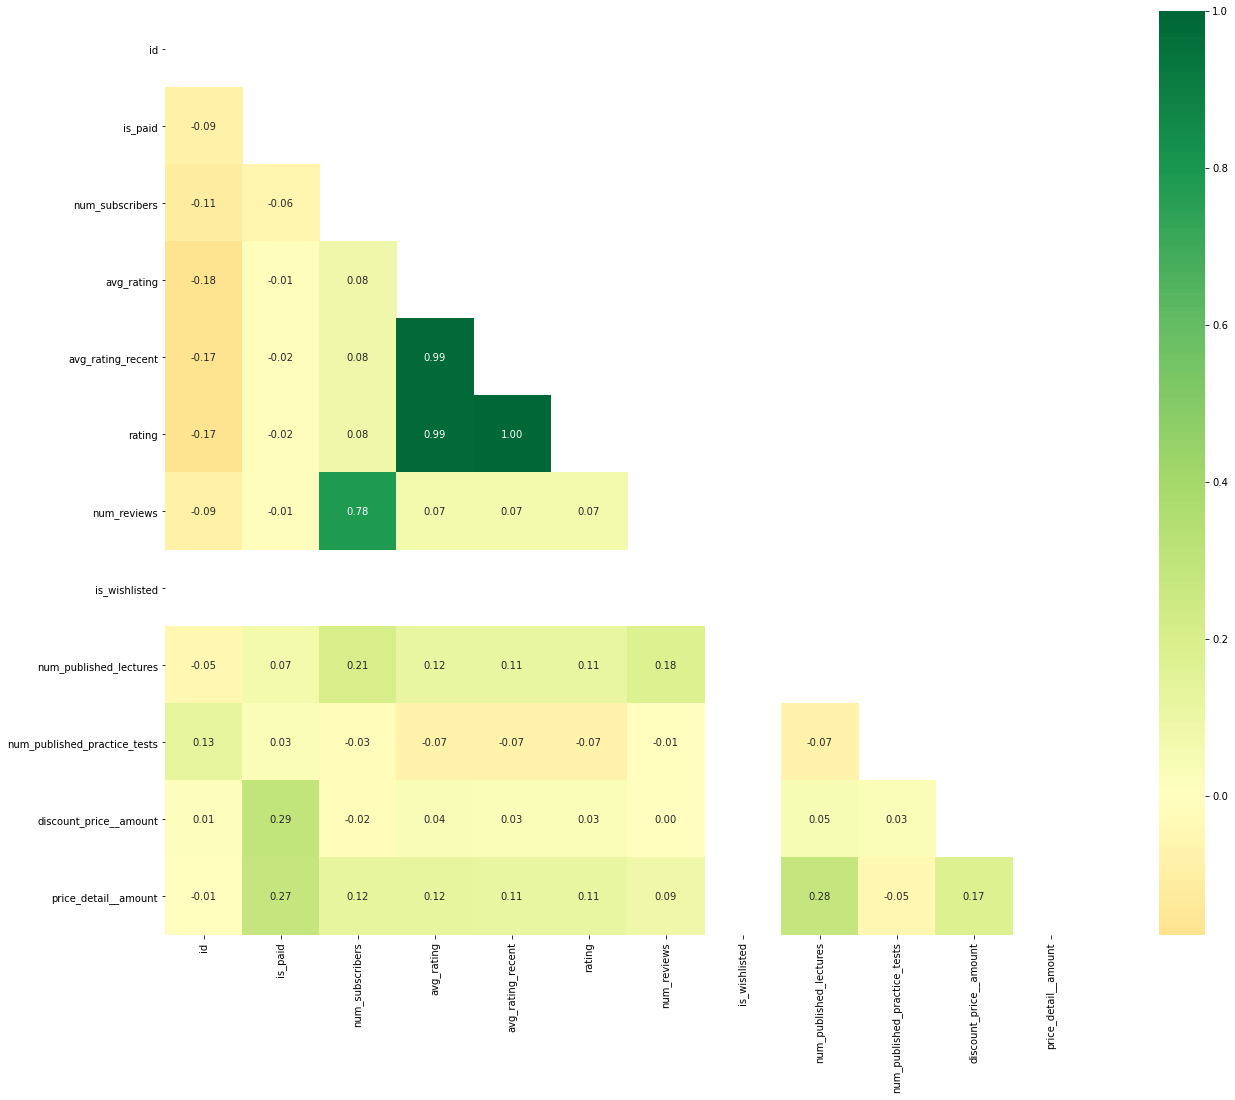

In [15]:
# check for collinearity in features using heatmap
matrix = df.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(26, 15, s=75, l=40, n=9, center="dark", as_cmap=True)
plt.figure(figsize = (25,17))

sns.heatmap(matrix, mask=mask, center = 0, annot = True, fmt='.2f', square = True, cmap="RdYlGn")
plt.show()


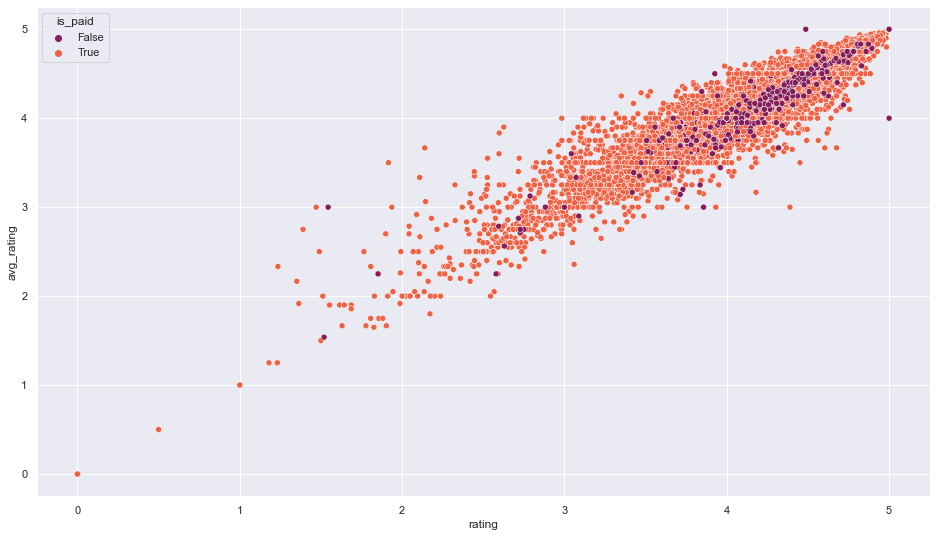

In [16]:
# graph to prove the collinearity between avg_rating and rating
sns.set()
plt.figure(figsize = (16,9))
sns.scatterplot(x=df.loc[:,'rating'], y=df.loc[:,'avg_rating'], palette = 'rocket', hue=df.is_paid)

Based on this graph, it will be wise to drop one of the above feature since they both have similar data.

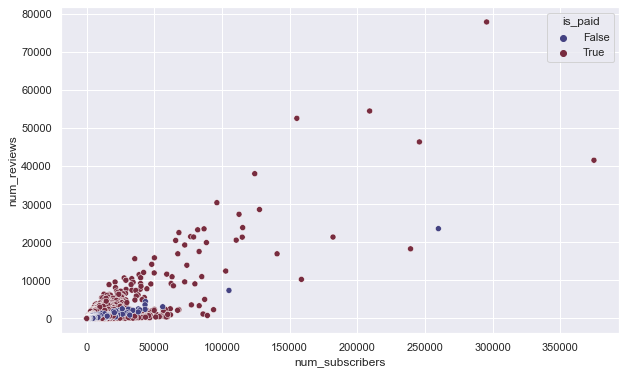

In [17]:
sns.set()
plt.figure(figsize = (10,6))
sns.scatterplot(x=df.num_subscribers, y=df.num_reviews, palette = 'icefire', hue=df.is_paid)

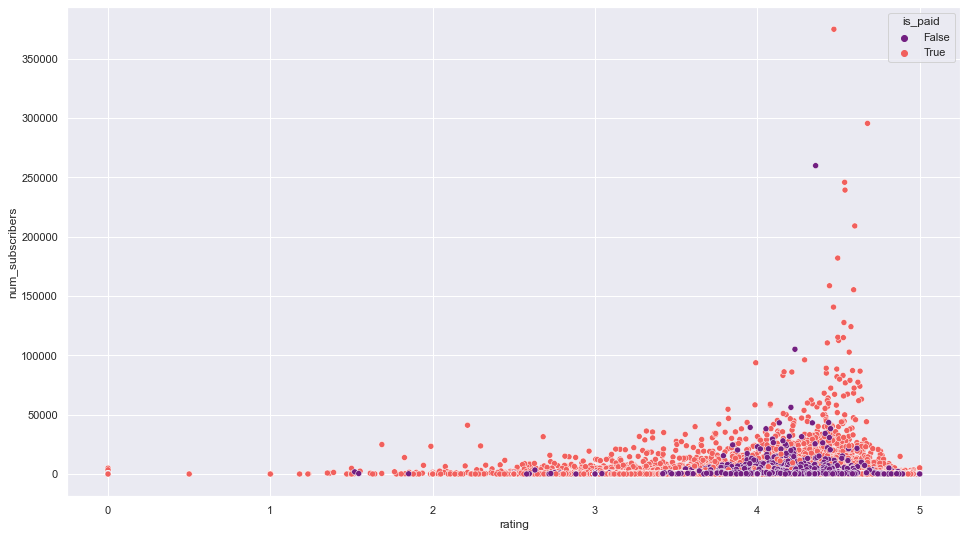

In [18]:
sns.set()
plt.figure(figsize = (16,9))
sns.scatterplot(x=df.loc[:,'rating'], y=df.loc[:,'num_subscribers'], hue=df.is_paid, palette='magma')

Graph above, tells us the following:
* The number of subscribers has no effect on the rating of a course. We can see concentration of raters at the bottom between 0 to 50,000 subscribers.
* The sparse number of courses with both very high number of subscribers and high ratings are mostly paid courses.
* A very high number of unpaid courses with less than 50,000 have good ratings ranging from 3.5 to 5.0, which I find impressive.

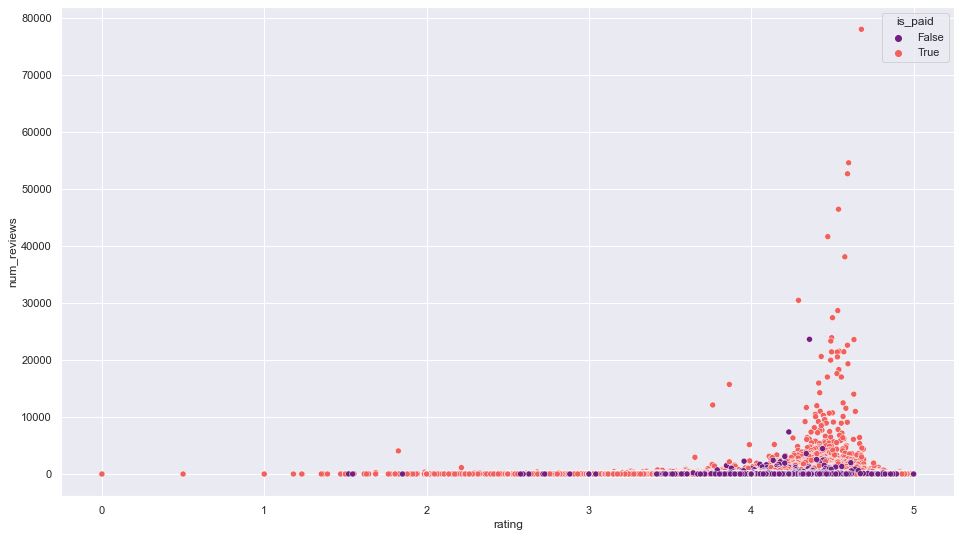

In [19]:
sns.set()
plt.figure(figsize = (16,9))
sns.scatterplot(x=df.loc[:,'rating'], y=df.loc[:,'num_reviews'], hue=df.is_paid, palette='magma')

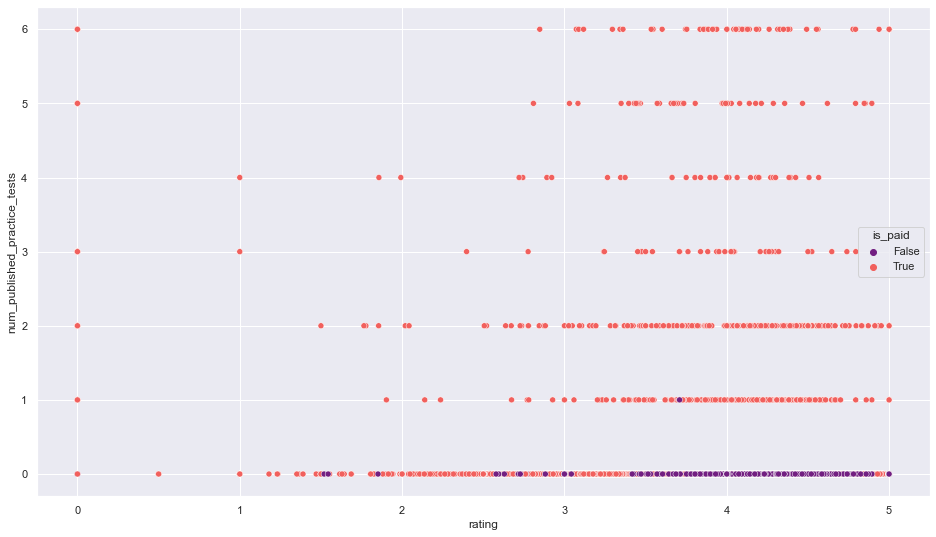

In [20]:
sns.set()
plt.figure(figsize = (16,9))
sns.scatterplot(x=df.loc[:,'rating'], y=df.loc[:,'num_published_practice_tests'], hue=df.is_paid, palette='magma')

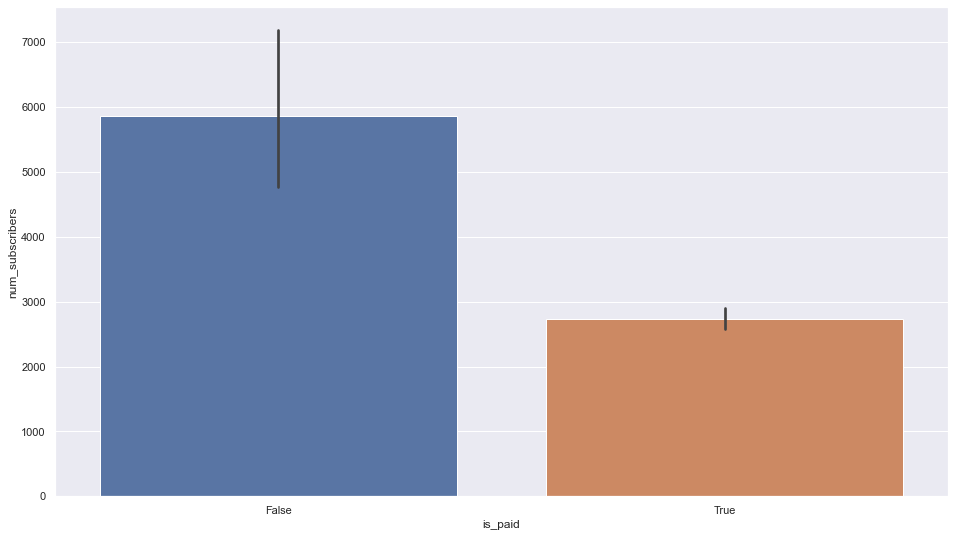

In [21]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(x=df.loc[:,'is_paid'], y=df.loc[:,'num_subscribers'])

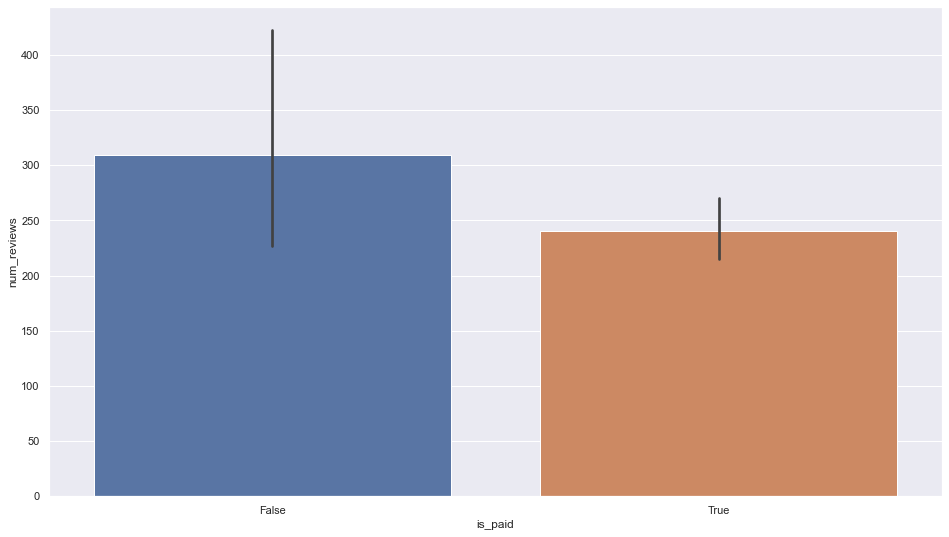

In [22]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(x=df.loc[:,'is_paid'], y=df.loc[:,'num_reviews'])

In [23]:
# getting a glance of outliers up-top

df.loc[:,['title', 'is_paid','rating','num_subscribers']].sort_values(by = 'num_subscribers', ascending = False)

title  is_paid   rating  \
4      An Entire MBA in 1 Course:Award Winning Busine...     True  4.47173   
0      The Complete SQL Bootcamp 2020: Go from Zero t...     True  4.67874   
11484               Stock Market Investing for Beginners    False  4.35902   
3             The Complete Financial Analyst Course 2020     True  4.53772   
19     Deep Learning Prerequisites: The Numpy Stack i...     True  4.54005   
...                                                  ...      ...      ...   
13242   TECHNOLOGIE DER ZUKUNFT - DER SMARTER AUFSTELLER     True  0.00000   
13241  Quais medidas contábeis adotar em tempos de crise     True  0.00000   
13240               Comment créer un budget prévisionnel     True  0.00000   
11219                      Increasing Your Net Cash Flow     True  0.00000   
13607         Acabou a Previdência e agora? -  Volume 03     True  0.00000   

       num_subscribers  
4               374836  
0               295509  
11484           259888  
3               245860  
19              239309  
...                ...  
13242                0  
13241                0  
13240                0  
11219                0  
13607                0  

[13608 rows x 4 columns]

# Data Cleaning Process

In [24]:
df["price_amount_usd"] = df["price_detail__amount"].apply(lambda x: x*0.014) # former feature name will be dropped in next cell
df["discount_amount_usd"] = df["discount_price__amount"].apply(lambda x: x*0.014) # former feature name will be dropped in next cell
df.head()

id                                              title  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3   648826         The Complete Financial Analyst Course 2020   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...   

                                                 url  is_paid  \
0                 /course/the-complete-sql-bootcamp/     True   
1                                 /course/tableau10/     True   
2                        /course/pmp-pmbok6-35-pdus/     True   
3     /course/the-complete-financial-analyst-course/     True   
4  /course/an-entire-mba-in-1-courseaward-winning...     True   

   num_subscribers  avg_rating  avg_rating_recent   rating  num_reviews  \
0           295509     4.66019            4.67874  4.67874        78006   
1           209070     4.58956            4.60015  4.60015        54581   
2           155282     4.59491            4.59326  4.59326        52653   
3           245860     4.54407            4.53772  4.53772        46447   
4           374836     4.47080            4.47173  4.47173        41630   

   is_wishlisted  num_published_lectures  num_published_practice_tests  \
0          False                      84                             0   
1          False                      78                             0   
2          False                     292                             2   
3          False                     338                             0   
4          False                      83                             0   

                created        published_time  discount_price__amount  \
0  2016-02-14T22:57:48Z  2016-04-06T05:16:11Z                   455.0   
1  2016-08-22T12:10:18Z  2016-08-23T16:59:49Z                   455.0   
2  2017-09-26T16:32:48Z  2017-11-14T23:58:14Z                   455.0   
3  2015-10-23T13:34:35Z  2016-01-21T01:38:48Z                   455.0   
4  2015-10-12T06:39:46Z  2016-01-11T21:39:33Z                   455.0   

   price_detail__amount  price_amount_usd  discount_amount_usd  
0                8640.0            120.96                 6.37  
1                8640.0            120.96                 6.37  
2                8640.0            120.96                 6.37  
3                8640.0            120.96                 6.37  
4                8640.0            120.96                 6.37

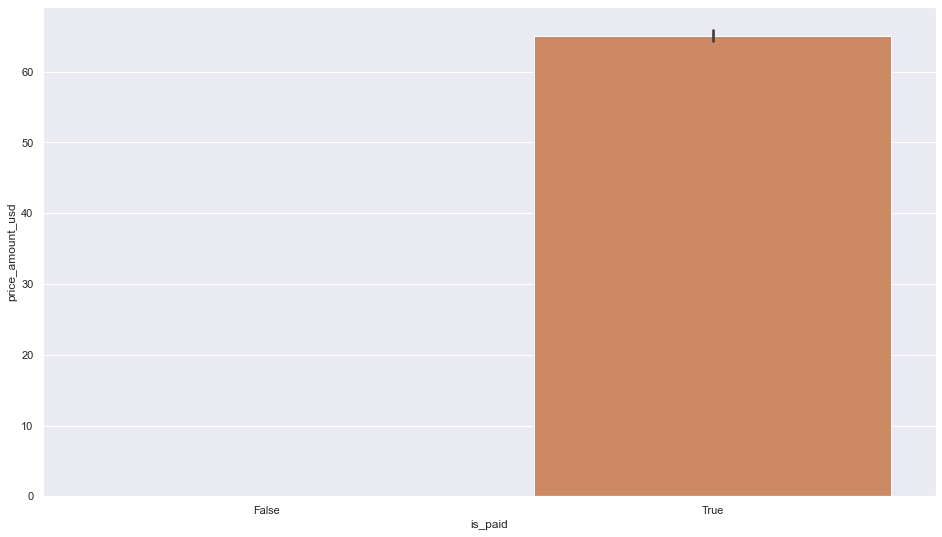

In [25]:
#this can serve as a check to verify non-paying courses are without dollar amounts
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(x=df.loc[:,'is_paid'], y=df.loc[:,'price_amount_usd'])

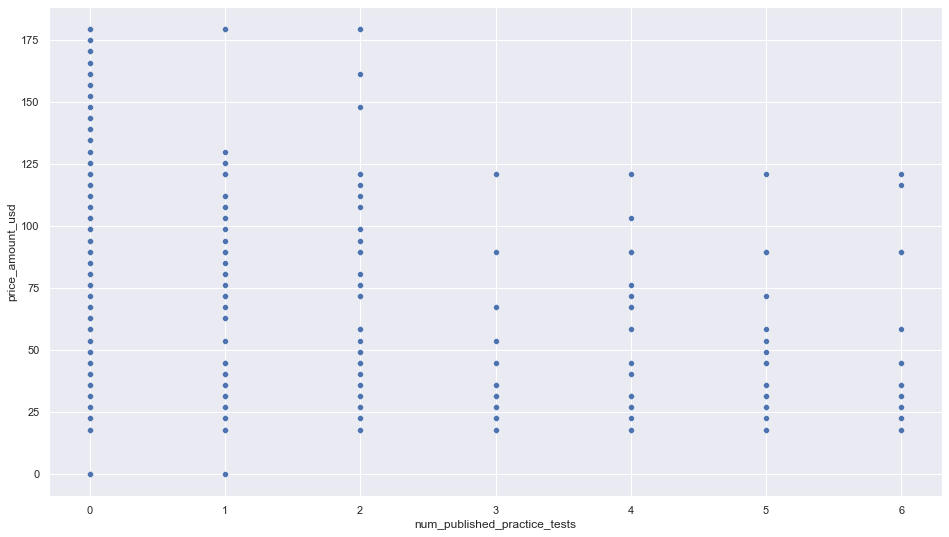

In [26]:
sns.set()
plt.figure(figsize = (16,9))
sns.scatterplot(x=df.loc[:,'num_published_practice_tests'], y=df.loc[:,'price_amount_usd'])

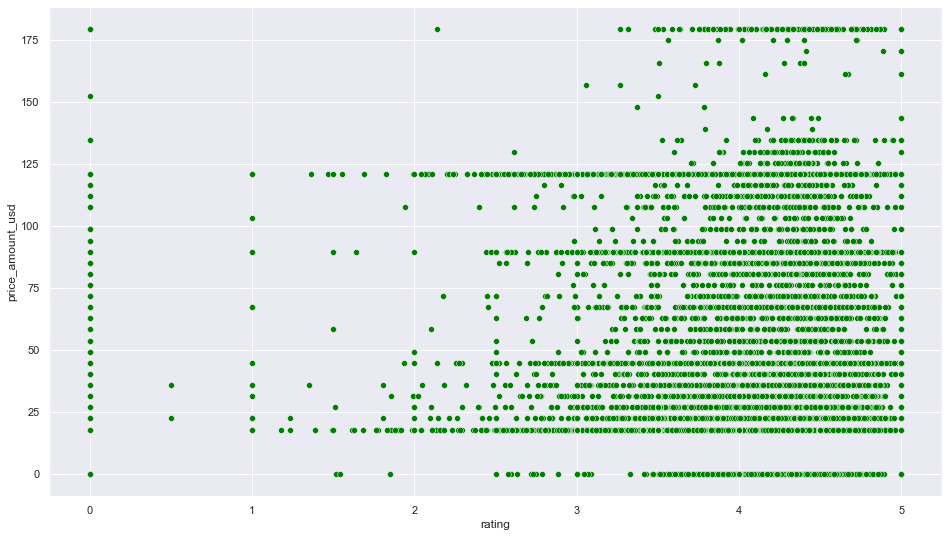

In [27]:
sns.set()
plt.figure(figsize = (16,9))
sns.scatterplot(x=df.loc[:,'rating'], y=df.loc[:,'price_amount_usd'], color = 'green')

The vast majority of courses with good ratings are priced between 20 to 120 dollars. Also, most of the highest priced courses have ratings more than 3.0 except 2 courses.

In [28]:
df = df.drop(['id',  'is_wishlisted', 'url', 'discount_price__amount', 
              'price_detail__amount', 'avg_rating_recent', 'avg_rating'], axis = 1)

In [29]:
df.head()

title  is_paid  \
0  The Complete SQL Bootcamp 2020: Go from Zero t...     True   
1  Tableau 2020 A-Z: Hands-On Tableau Training fo...     True   
2             PMP Exam Prep Seminar -  PMBOK Guide 6     True   
3         The Complete Financial Analyst Course 2020     True   
4  An Entire MBA in 1 Course:Award Winning Busine...     True   

   num_subscribers   rating  num_reviews  num_published_lectures  \
0           295509  4.67874        78006                      84   
1           209070  4.60015        54581                      78   
2           155282  4.59326        52653                     292   
3           245860  4.53772        46447                     338   
4           374836  4.47173        41630                      83   

   num_published_practice_tests               created        published_time  \
0                             0  2016-02-14T22:57:48Z  2016-04-06T05:16:11Z   
1                             0  2016-08-22T12:10:18Z  2016-08-23T16:59:49Z   
2                             2  2017-09-26T16:32:48Z  2017-11-14T23:58:14Z   
3                             0  2015-10-23T13:34:35Z  2016-01-21T01:38:48Z   
4                             0  2015-10-12T06:39:46Z  2016-01-11T21:39:33Z   

   price_amount_usd  discount_amount_usd  
0            120.96                 6.37  
1            120.96                 6.37  
2            120.96                 6.37  
3            120.96                 6.37  
4            120.96                 6.37

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         13608 non-null  object 
 1   is_paid                       13608 non-null  bool   
 2   num_subscribers               13608 non-null  int64  
 3   rating                        13608 non-null  float64
 4   num_reviews                   13608 non-null  int64  
 5   num_published_lectures        13608 non-null  int64  
 6   num_published_practice_tests  13608 non-null  int64  
 7   created                       13608 non-null  object 
 8   published_time                13608 non-null  object 
 9   price_amount_usd              13608 non-null  float64
 10  discount_amount_usd           13608 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 1.1+ MB


In [31]:
df['is_paid'] = df['is_paid'].astype(np.int)